In [1]:
import numpy as np
import pandas as pd

/var/folders/vk/24j_xhv17pzdvd9jmf97hcc80000gn/T/ipykernel_83311/1662815981.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# 1. Load a CSV file into a Pandas DataFrame.

In [55]:
h=pd.read_csv('heart.csv')

In [56]:
type(h)

pandas.core.frame.DataFrame

# 2. Create a DataFrame from a NumPy array with custom column names.

In [42]:
a=np.array([[2,6,9,5],[29,4,3,22],[15,24,21,20]])
column=['Column1','Column2','Column3','Column4']

df=pd.DataFrame(data=a,columns=column)
df

,Column1,Column2,Column3,Column4
0,2,6,9,5
1,29,4,3,22
2,15,24,21,20


# 3. Select rows from a DataFrame based on multiple conditions.

In [46]:
df[1:2]

,Column1,Column2,Column3,Column4
1,29,4,3,22


In [49]:
df.loc[1:2]

,Column1,Column2,Column3,Column4
1,29,4,3,22
2,15,24,21,20


In [53]:
df.loc[(df['Column2']>4)& (df['Column4']>4)]

,Column1,Column2,Column3,Column4
0,2,6,9,5
2,15,24,21,20


In [54]:
df.query('Column1>3 and Column4>4')

,Column1,Column2,Column3,Column4
1,29,4,3,22
2,15,24,21,20


# 4. Select the first and last 7 rows of a Pandas DataFrame.

In [89]:
h.head(7)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0


In [90]:
h.tail(7)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


# 5. Filter rows based on a condition in a specific column in a Pandas DataFrame.

In [92]:
df.loc[(df['Column1']>3)&(df['Column2']<20)]

,Column1,Column2,Column3,Column4
1,29,4,3,22


6. Create a new column in a Pandas DataFrame based on the result of a NumPy operation.

In [94]:
df['Column4']=df.apply(lambda row:row['Column1']+ row['Column2'],axis=1)

In [96]:
df['Column5']=df['Column2']+df['Column3']

In [97]:
df

,Column1,Column2,Column3,Column4,Column5
0,2,6,9,8,15
1,29,4,3,33,7
2,15,24,21,39,45


# 7. Merge two Pandas DataFrames based on a common column.

In [102]:
a=np.array([[1,5],[29,14],[15,24]])
column=['Column1','Column2']

df2=pd.DataFrame(data=a,columns=column)
df2

,Column1,Column2
0,1,5
1,29,14
2,15,24


In [103]:
df

,Column1,Column2,Column3,Column4,Column5
0,2,6,9,8,15
1,29,4,3,33,7
2,15,24,21,39,45


In [106]:
pd.merge(df,df2,on='Column2')

,Column1_x,Column2,Column3,Column4,Column5,Column1_y
0,15,24,21,39,45,15


In [111]:
pd.concat([df,df2],axis=1)

,Column1,Column2,Column3,Column4,Column5,Column1,Column2
0,2,6,9,8,15,1,5
1,29,4,3,33,7,29,14
2,15,24,21,39,45,15,24


# 8. Extract rows from a Pandas DataFrame where a specific column's values are in a given NumPy array.

In [118]:
df=pd.DataFrame({'Name':['Athul','Arun','Abhi','Sachin'],'Age':[20,10,22,23],'Place':['Kochi','Kozhikode','Kannur','Wayanad']})
df

select_age=np.array([20,23])

df1=df[df['Age'].isin(select_age)]
df1

,Name,Age,Place
0,Athul,20,Kochi
3,Sachin,23,Wayanad


# 9. Perform element-wise addition of a NumPy array and a Pandas DataFrame column.

In [128]:
age1=np.array([4,10,5,7])
df['new_age']=np.add(df['Age'],age1)
df

,Name,Age,Place,new_age
0,Athul,20,Kochi,24
1,Arun,10,Kozhikode,20
2,Abhi,22,Kannur,27
3,Sachin,23,Wayanad,30


# 10. Apply a NumPy function to a Pandas DataFrame column.

In [129]:
df['sqrt']=np.sqrt(df['Age'])
df

,Name,Age,Place,new_age,sqrt
0,Athul,20,Kochi,24,4.472136
1,Arun,10,Kozhikode,20,3.162278
2,Abhi,22,Kannur,27,4.690416
3,Sachin,23,Wayanad,30,4.795832


In [130]:
df['mean']=np.mean(df['Age'])
df

,Name,Age,Place,new_age,sqrt,mean
0,Athul,20,Kochi,24,4.472136,18.75
1,Arun,10,Kozhikode,20,3.162278,18.75
2,Abhi,22,Kannur,27,4.690416,18.75
3,Sachin,23,Wayanad,30,4.795832,18.75


In [131]:
df['square']=np.square(df['Age'])
df

,Name,Age,Place,new_age,sqrt,mean,square
0,Athul,20,Kochi,24,4.472136,18.75,400
1,Arun,10,Kozhikode,20,3.162278,18.75,100
2,Abhi,22,Kannur,27,4.690416,18.75,484
3,Sachin,23,Wayanad,30,4.795832,18.75,529


In [139]:
np.max(df['Age'])

23

In [141]:
df.describe()

,Age,new_age,sqrt,mean,square
count,4.000000,4.000000,4.000000,4.00,4.000000
mean,18.750000,25.250000,4.280165,18.75,378.250000
std,5.965177,4.272002,0.757351,0.00,193.049864
min,10.000000,20.000000,3.162278,18.75,100.000000
25%,17.500000,23.000000,4.144671,18.75,325.000000
50%,21.000000,25.500000,4.581276,18.75,442.000000
75%,22.250000,27.750000,4.716770,18.75,495.250000
max,23.000000,30.000000,4.795832,18.75,529.000000


# 11. Calculate the correlation matrix for a Pandas DataFrame.

In [151]:
a=np.array([[1,5,23],[10,29,14],[15,2,24]])
column=['Column1','Column2','Column3']

df2=pd.DataFrame(data=a,columns=column)
df2.corr()


,Column1,Column2,Column3
Column1,1.000000,0.061910,-0.072512
Column2,0.061910,1.000000,-0.999944
Column3,-0.072512,-0.999944,1.000000


# 12. Calculate the cumulative sum of a NumPy array and store the results in a new Pandas DataFrame column.

In [172]:
df['sum']=np.cumsum(df['Age'])
df

,Name,Age,Place,new_age,sqrt,mean,square,sum
0,Athul,20,Kochi,24,4.472136,18.75,400,20
1,Arun,10,Kozhikode,20,3.162278,18.75,100,30
2,Abhi,22,Kannur,27,4.690416,18.75,484,52
3,Sachin,23,Wayanad,30,4.795832,18.75,529,75


# 13. Group a Pandas DataFrame by a column and calculate the mean of another column.

In [178]:
h.groupby('ChestPainType')['RestingBP'].mean()

ChestPainType
ASY    133.229839
ATA    130.624277
NAP    130.960591
TA     136.413043
Name: RestingBP, dtype: float64

# 14. Reshape a Pandas DataFrame using the pivot_table function.

# 15. Replace missing values in a Pandas DataFrame with the mean of the column.

In [171]:
r=pd.DataFrame({'Name':['Athul','Arun','Abhi','Sachin'],'Age':[20,np.nan,12,np.nan],'Place':['Kochi','Kozhikode','Kannur','Wayanad']})
r

,Name,Age,Place
0,Athul,20.0,Kochi
1,Arun,NaN,Kozhikode
2,Abhi,22.0,Kannur
3,Sachin,NaN,Wayanad


In [180]:
meanofage=r['Age'].mean()

In [181]:
r['Age']=r['Age'].fillna(meanofage)

In [182]:
r

,Name,Age,Place
0,Athul,20.0,Kochi
1,Arun,21.0,Kozhikode
2,Abhi,22.0,Kannur
3,Sachin,21.0,Wayanad


# 16. Create a histogram of a numerical column using NumPy and Matplotlib.

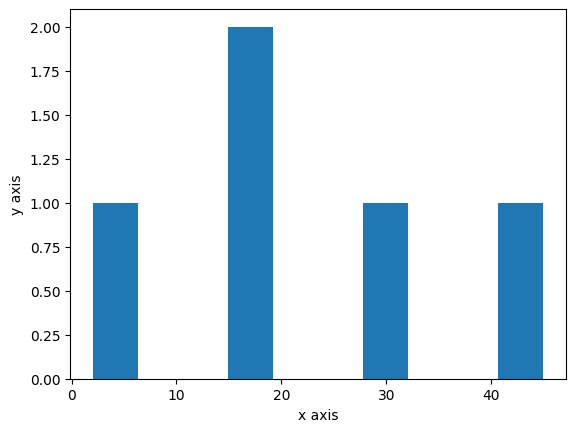

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt


a=np.array([[2,6,9,5],[29,4,3,22],[15,24,21,20],[45,4,1,2],[19,21,10,50]])
column=['Column1','Column2','Column3','Column4']

d=pd.DataFrame(data=a,columns=column)
d
x=d['Column1']
y=d['Column2']
plt.hist(x)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

# 17. Normalize a numerical column in a Pandas DataFrame.

In [293]:
import pandas as pd
# Create a sample DataFrame with a numerical column
data = {'Values': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

df
min_val = df['Values'].min()
max_val = df['Values'].max()
scaled_column = (df['Values'] - min_val) / (max_val - min_val)
# print(scaled_column)


# Apply Min-Max scaling to the 'Values' column
df['Normalized_Values'] = scaled_column

# Display the normalized DataFrame
df

,Values,Normalized_Values
0,10,0.00
1,20,0.25
2,30,0.50
3,40,0.75
4,50,1.00


# 18. Remove duplicate rows from a Pandas DataFrame.

In [204]:
a=np.array([[5,5,5,5],[29,5,3,22],[5,5,5,5]])
column=['Column1','Column2','Column3','Column4']
b=pd.DataFrame(data=a,columns=column)
b

,Column1,Column2,Column3,Column4
0,5,5,5,5
1,29,5,3,22
2,5,5,5,5


In [205]:
b.drop_duplicates()


,Column1,Column2,Column3,Column4
0,5,5,5,5
1,29,5,3,22


# 19. Perform element-wise addition on two NumPy arrays.

In [207]:
num1=np.array([4,10,5,7])
num2=np.array([10,20,30,40])
add=np.add(num1,num2)
add

array([14, 30, 35, 47])

# 20. Calculate the dot product of two NumPy arrays.

In [215]:
num1=np.array([[4,10],[10,2]])
num2=np.array([[10,30],[3,7]])
p=np.dot(num1,num2)
p

array([[ 70, 190],
       [106, 314]])

# 21. Find the index of the maximum and minimum value in a NumPy array.

In [221]:
num1=np.array([4,10,5,7])
print('max is',np.argmax(num1))
print('min is',np.argmin(num1))

max is 1
min is 0


# 22. Reshape a 1D NumPy array into a 2D array.

In [226]:
num1=np.array([4,10,5,7])
np.ndim(num1)
num2=num1.reshape(2,2)
np.ndim(num2)

2

# 23. Slice and extract a portion of a NumPy array.

In [295]:
h[10:20]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
10,37,F,NAP,130,211,0,Normal,142,N,0.0,Up,0
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
12,39,M,ATA,120,204,0,Normal,145,N,0.0,Up,0
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1
14,42,F,NAP,115,211,0,ST,137,N,0.0,Up,0
15,54,F,ATA,120,273,0,Normal,150,N,1.5,Flat,0
16,38,M,ASY,110,196,0,Normal,166,N,0.0,Flat,1
17,43,F,ATA,120,201,0,Normal,165,N,0.0,Up,0
18,60,M,ASY,100,248,0,Normal,125,N,1.0,Flat,1
19,36,M,ATA,120,267,0,Normal,160,N,3.0,Flat,1


# 24. Concatenate two NumPy arrays vertically.

In [243]:
num1=np.array([[4,10,3],[10,2,5]])
num2=np.array([[10,30,2],[3,7,6]])

np.concatenate((num1,num2))

array([[ 4, 10,  3],
       [10,  2,  5],
       [10, 30,  2],
       [ 3,  7,  6]])

In [284]:
num1=np.array([[4,10,3],[10,2,5]])
num2=np.array([[10,30,2],[3,7,6]])

print(np.vstack((num1,num2)))


[[ 4 10  3]
 [10  2  5]
 [10 30  2]
 [ 3  7  6]]


# 25. Perform matrix multiplication using NumPy.

In [247]:
num1=np.array([[4,10],[10,2]])
num2=np.array([[10,2],[3,6]])
np.multiply(num1,num2)

array([[40, 20],
       [30, 12]])

# 26. Calculate the cumulative sum of a NumPy array.

In [250]:
num1=np.array([4,10,5,7])

np.cumsum(num1)

array([ 4, 14, 19, 26])

# 27. Create a NumPy array with random values and find the unique values.

In [263]:
num1=np.array([4,10,5,7,5,3,5,1])
np.unique(num1)

array([ 1,  3,  4,  5,  7, 10])

# 28. Sort a Pandas DataFrame by values in a specific column.

In [297]:
df=pd.DataFrame({'Name':['Athul','Arun','Abhi','Sachin'],'Age':[20,10,22,23],'Place':['Kochi','Kozhikode','Kannur','Wayanad']})
df.sort_values('Age')

,Name,Age,Place
1,Arun,10,Kozhikode
0,Athul,20,Kochi
2,Abhi,22,Kannur
3,Sachin,23,Wayanad


# 29. Apply a custom function to each element in a Pandas DataFrame.

In [271]:
df=pd.DataFrame({'Name':['Athul','Arun','Abhi','Sachin'],'Age':[20,10,22,23],'Place':['Kochi','Kozhikode','Kannur','Wayanad']})
def double(age):
    return age*2
df['doubled_age']=df['Age'].apply(double)
df

,Name,Age,Place,doubled_age
0,Athul,20,Kochi,40
1,Arun,10,Kozhikode,20
2,Abhi,22,Kannur,44
3,Sachin,23,Wayanad,46


# 30. Rename columns in a Pandas DataFrame.

In [282]:
df=df.rename(columns={'Place':'Location'})
df

,Name,Age,Location,doubled_age
0,Athul,20,Kochi,40
1,Arun,10,Kozhikode,20
2,Abhi,22,Kannur,44
3,Sachin,23,Wayanad,46


# 31. Create a new DataFrame by transposing an existing one.

In [304]:
t=df.transpose()
t

,0,1,2,3
Name,Athul,Arun,Abhi,Sachin
Age,20,10,22,23
Place,Kochi,Kozhikode,Kannur,Wayanad


# 32. Merge two DataFrames based on multiple columns.

In [307]:
a=np.array([[2,6,9,5],[29,4,3,22],[15,24,21,20],[9,4,37,2]])
column=['Column1','Column2','Column3','Column4']

a=pd.DataFrame(data=a,columns=column)
a

,Column1,Column2,Column3,Column4
0,2,6,9,5
1,29,4,3,22
2,15,24,21,20
3,9,4,37,2


In [317]:
df

,Name,Age,Place,Column1
0,Athul,20,Kochi,1
1,Arun,10,Kozhikode,2
2,Abhi,22,Kannur,3
3,Sachin,23,Wayanad,4


In [316]:
df['Column1']=[1,2,3,4]

In [323]:
pd.merge(df,a,how='right',on='Column1')

,Name,Age,Place,Column1,Column2,Column3,Column4
0,Arun,10.0,Kozhikode,2,6,9,5
1,NaN,NaN,NaN,29,4,3,22
2,NaN,NaN,NaN,15,24,21,20
3,NaN,NaN,NaN,9,4,37,2


# 33. Aggregate data in a DataFrame by multiple functions.

In [336]:
import pandas as pd

# Create a sample DataFrame
data = {'Department': ['HR', 'IT', 'Finance', 'IT', 'HR', 'Finance'],
        'Salary': [50000, 60000, 45000, 70000, 55000, 60000],
        'Experience': [2, 5, 1, 7, 3, 4]}

df = pd.DataFrame(data)

# Group by 'Department' and aggregate data with multiple functions
aggregated_df = df.groupby('Department').agg({
    'Salary': ['mean', 'sum'],
    'Experience': 'max'
}).reset_index()

# Display the aggregated DataFrame
aggregated_df

Department   Salary         Experience
                 mean     sum        max
0    Finance  52500.0  105000          4
1         HR  52500.0  105000          3
2         IT  65000.0  130000          7

In [338]:
aggregated_df = df.groupby('Department').agg({'Experience':'max'})
aggregated_df

,Experience
Department,
Finance,4
HR,3
IT,7


In [332]:
aggregated_df = df.groupby('Department').sum()
aggregated_df

,Salary,Experience
Department,,
Finance,105000,5
HR,105000,5
IT,130000,12


# 34. Extract the date and time components from a DateTime column.

In [46]:
import pandas as pd
data=pd.DataFrame()
data['Date_Time'] = pd.date_range('1/1/2011 10:10', periods = 10, freq ='d')
 


# data['Date_Time']=pd.to_datetime(data['Date_Time'])
data['Date']=data['Date_Time'].dt.date
data['Time']=data['Date_Time'].dt.time
data

,Date_Time,Date,Time
0,2011-01-01 10:10:00,2011-01-01,10:10:00
1,2011-01-02 10:10:00,2011-01-02,10:10:00
2,2011-01-03 10:10:00,2011-01-03,10:10:00
3,2011-01-04 10:10:00,2011-01-04,10:10:00
4,2011-01-05 10:10:00,2011-01-05,10:10:00
5,2011-01-06 10:10:00,2011-01-06,10:10:00
6,2011-01-07 10:10:00,2011-01-07,10:10:00
7,2011-01-08 10:10:00,2011-01-08,10:10:00
8,2011-01-09 10:10:00,2011-01-09,10:10:00
9,2011-01-10 10:10:00,2011-01-10,10:10:00


In [48]:
data = {'DateTime': ['2012-01-01 08:30:00', '2012-01-02 12:45:00', '2012-01-03 18:15:00']}
df = pd.DataFrame(data)

# Convert the 'DateTime' column to a datetime type
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract date and time components
df['Date'] = df['DateTime'].dt.date
df['Time'] = df['DateTime'].dt.time

# Display the DataFrame with extracted components
df

,DateTime,Date,Time
0,2012-01-01 08:30:00,2012-01-01,08:30:00
1,2012-01-02 12:45:00,2012-01-02,12:45:00
2,2012-01-03 18:15:00,2012-01-03,18:15:00


# 35. Resample time-series data in a DataFrame.

In [58]:
date_rng = pd.date_range(start='2012-01-01', end='2012-01-10', freq='D')
data = {'Value': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
df = pd.DataFrame(data, index=date_rng)

# Resample the DataFrame to a weekly frequency, calculating the mean
resampled_df = df.resample('W').mean()

# Display the original and resampled DataFrames
print("Original DataFrame:")
print(df)
print("\nResampled DataFrame:")
print(resampled_df)

Original DataFrame:
            Value
2012-01-01      1
2012-01-02      2
2012-01-03      3
2012-01-04      4
2012-01-05      5
2012-01-06      6
2012-01-07      7
2012-01-08      8
2012-01-09      9
2012-01-10     10

Resampled DataFrame:
            Value
2012-01-01    1.0
2012-01-08    5.0
2012-01-15    9.5


# 36. Perform a rolling calculation on a numerical column in a DataFrame.

In [60]:
data = {'Value': [10, 15, 20, 25, 30, 35, 40, 45, 50]}
df = pd.DataFrame(data)


rolling_mean = df['Value'].rolling(window=2).mean()
rolling_sum = df['Value'].rolling(window=3).sum()

# Add the rolling mean as a new column to the DataFrame
df['Rolling_Mean'] = rolling_mean
df['Rolling_Sum']=rolling_sum

# Display the original and modified DataFrame
print("Original DataFrame:")
print(df)


Original DataFrame:
   Value  Rolling_Mean  Rolling_Sum
0     10           NaN          NaN
1     15          12.5          NaN
2     20          17.5         45.0
3     25          22.5         60.0
4     30          27.5         75.0
5     35          32.5         90.0
6     40          37.5        105.0
7     45          42.5        120.0
8     50          47.5        135.0


# 37. Perform a cross-tabulation between two columns in a DataFrame.

In [66]:
data = {'Category': ['A', 'B', 'A', 'B', 'C', 'A', 'C', 'C', 'B', 'A'],
        'Value': [30, 15, 20, 25, 30, 30, 40, 45, 50, 55]}

df = pd.DataFrame(data)

# Perform a cross-tabulation between 'Category' and 'Value'
cross_tab = pd.crosstab(df['Category'], df['Value'])

# Display the cross-tabulation
print(cross_tab)

Value     15  20  25  30  40  45  50  55
Category                                
A          0   1   0   2   0   0   0   1
B          1   0   1   0   0   0   1   0
C          0   0   0   1   1   1   0   0
